In [ ]:
#Linear regression
import pandas as pd

# library for scientific calculations on numbers + linear algebra
import numpy as np
import math

# library for regular plot visualizations
import matplotlib.pyplot as plt

#library for responsive visualizations
import plotly.express as px

data = pd.read_csv('swedish_insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   Y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [ ]:
print(data.columns)
data.head(10)


Index(['X', 'Y'], dtype='object')


,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
5,57,170.9
6,23,56.9
7,14,77.5
8,45,214.0
9,10,65.3


In [ ]:
fig = px.box(data['X'], points = 'all')
fig.update_layout(title = f'Distribution of X',title_x=0.5, yaxis_title= "Number of Insurance Claims")
fig.show()

fig = px.box(data['Y'], points = 'all')
fig.update_layout(title = f'Distribution of Y',title_x=0.5, yaxis_title= "Amount of Insurance Paid")
fig.show()


In [ ]:
fig = px.scatter(x = data['X'], y=data['Y'])
fig.update_layout(title = 'Swedish Automobiles Data', title_x=0.5, xaxis_title= "Number of Claims", yaxis_title="Payment in Claims", height = 500, width = 700)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

In [ ]:
data['Y']


0     392.5
1      46.2
2      15.7
3     422.2
4     119.4
      ...  
58     87.4
59    209.8
60     95.5
61    244.6
62    187.5
Name: Y, Length: 63, dtype: float64

In [ ]:
mean_x = np.mean(data['X'])
mean_y = np.mean(data['Y'])

var_x = np.var(data['X'])
var_y = np.var(data['Y'])


print('x stats: mean= %.3f   variance= %.3f' % (mean_x, var_x))
print('y stats: mean= %.3f   variance= %.3f' % (mean_y, var_y))

x stats: mean= 22.905   variance= 536.658
y stats: mean= 98.187   variance= 7505.052


In [ ]:
def covariance(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar/len(x)



covar_xy = covariance(data['X'], data['Y'])
print(f'Cov(X,Y): {covar_xy}')

Cov(X,Y): 1832.0543461829182


In [ ]:
b1 = covar_xy / var_x
b0 = mean_y - b1 * mean_x

print(f'Coefficents:\n b0: {b0}  b1: {b1} ')

Coefficents:
 b0: 19.99448575911478  b1: 3.413823560066368 


In [ ]:
x = data['X'].values.copy()
x

array([108,  19,  13, 124,  40,  57,  23,  14,  45,  10,   5,  48,  11,
        23,   7,   2,  24,   6,   3,  23,   6,   9,   9,   3,  29,   7,
         4,  20,   7,   4,   0,  25,   6,   5,  22,  11,  61,  12,   4,
        16,  13,  60,  41,  37,  55,  41,  11,  27,   8,   3,  17,  13,
        13,  15,   8,  29,  30,  24,   9,  31,  14,  53,  26])

In [ ]:
x = data['X'].values.copy()
# x.sort()
print(f'x: {x}')

# Predicting the new data based on calculated coeffiecents.
y_hat = b0 + b1 * x
print(f'\n\ny_hat: {y_hat}')

y = data['Y'].values
print(f'\n\ny: {y}')

x: [108  19  13 124  40  57  23  14  45  10   5  48  11  23   7   2  24   6
   3  23   6   9   9   3  29   7   4  20   7   4   0  25   6   5  22  11
  61  12   4  16  13  60  41  37  55  41  11  27   8   3  17  13  13  15
   8  29  30  24   9  31  14  53  26]


y_hat: [388.68743025  84.8571334   64.37419204 443.30860721 156.54742816
 214.58242868  98.51242764  67.7880156  173.61654596  54.13272136
  37.06360356 183.85801664  57.54654492  98.51242764  43.89125068
  26.82213288 101.9262512   40.47742712  30.23595644  98.51242764
  40.47742712  50.7188978   50.7188978   30.23595644 118.995369
  43.89125068  33.64978     88.27095696  43.89125068  33.64978
  19.99448576 105.34007476  40.47742712  37.06360356  95.09860408
  57.54654492 228.23772292  60.96036848  33.64978     74.61566272
  64.37419204 224.82389936 159.96125172 146.30595748 207.75478156
 159.96125172  57.54654492 112.16772188  47.30507424  30.23595644
  78.02948628  64.37419204  64.37419204  71.20183916  47.30507424
 118.99536

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=data['X'], y=data['Y'], name='train', mode='markers', marker_color='rgba(152, 0, 0, .8)'))
fig.add_trace(go.Scatter(x=data['X'], y=y_hat, name='prediction', mode='lines+markers', marker_color='rgba(0, 152, 0, .8)'))

fig.update_layout(title = f'Swedish Automobiles Data\n (visual comparison for correctness)',title_x=0.5, xaxis_title= "Number of Claims", yaxis_title="Payment in Claims")
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

In [ ]:
#multi linear regression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline
df = pd.read_csv('FuelConsumption.csv')
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


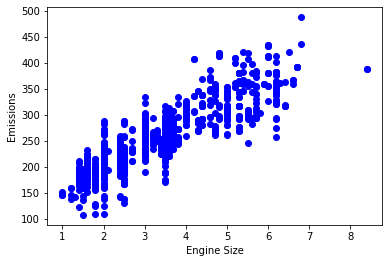

In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

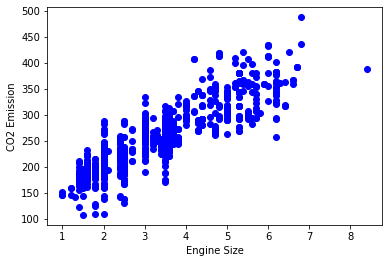

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.show()

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)

print('Coefficients: ', regr.coef_)


Coefficients:  [[ 9.99026497  7.59958763 10.13017762]]


In [ ]:
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print('Residual sum squares: %.2f' % np.mean((y_ - y) **2 ))
print('Variance score: %.2f' % regr.score(x,y))

Residual sum squares: 513.13
Variance score: 0.87


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LinearRegression was fitted without feature names

